In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [127]:
df = pd.read_csv("50_Startups.csv")

In [128]:
df.sample(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
35,46014.02,85047.44,205517.64,New York,96479.51
25,64664.71,139553.16,137962.62,California,107404.34
49,0.00,116983.80,45173.06,California,14681.40


In [129]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [130]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [132]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [133]:
df.select_dtypes(['float64']).corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [134]:
df_new = df

In [135]:
df_new = pd.DataFrame(df_new)

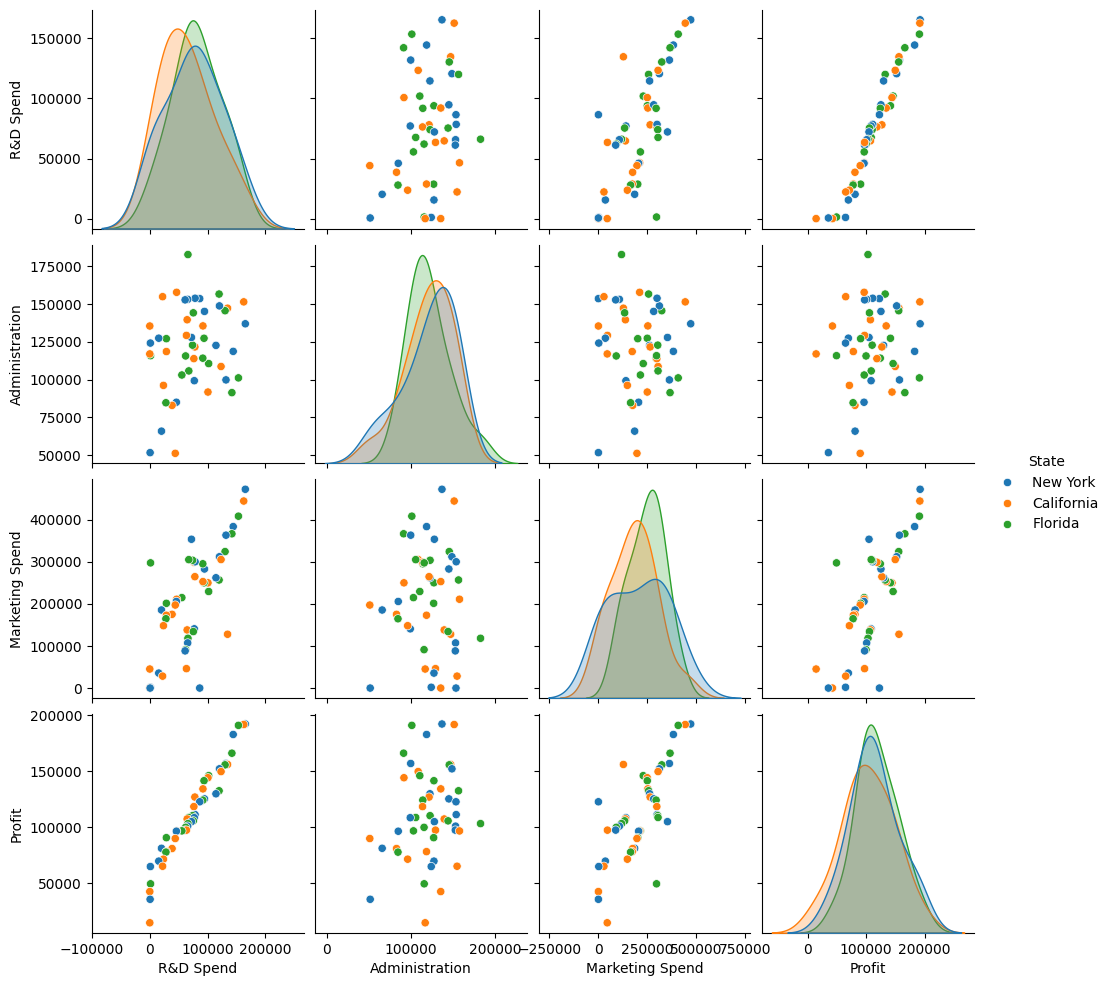

In [136]:
sns.pairplot(df_new,hue='State')

C:\Users\A\AppData\Local\Temp\ipykernel_4556\3607631006.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Administration'])


<Axes: xlabel='Administration', ylabel='Density'>

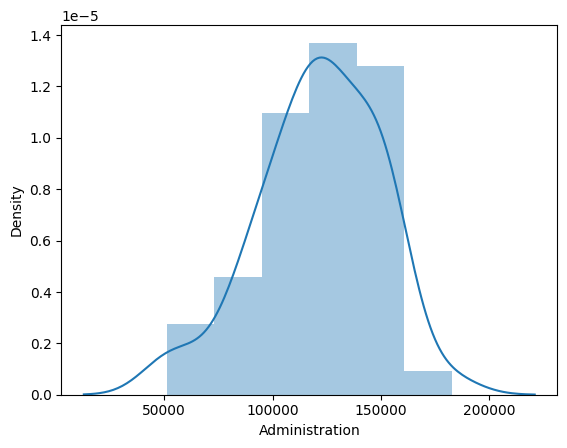

In [137]:
sns.distplot(df['Administration'])

C:\Users\A\AppData\Local\Temp\ipykernel_4556\3279449626.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Marketing Spend'])


<Axes: xlabel='Marketing Spend', ylabel='Density'>

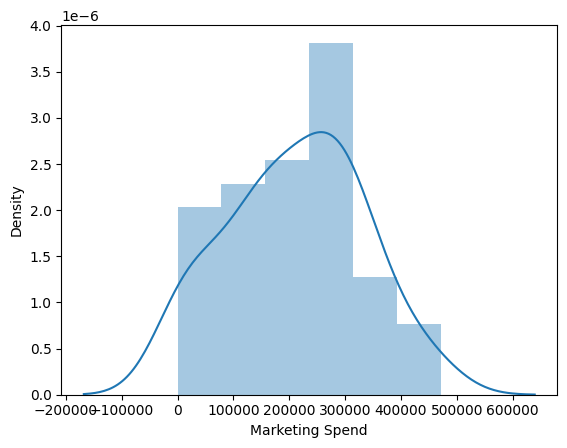

In [138]:
sns.distplot(df['Marketing Spend'])

C:\Users\A\AppData\Local\Temp\ipykernel_4556\1662588344.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Profit'])


<Axes: xlabel='Profit', ylabel='Density'>

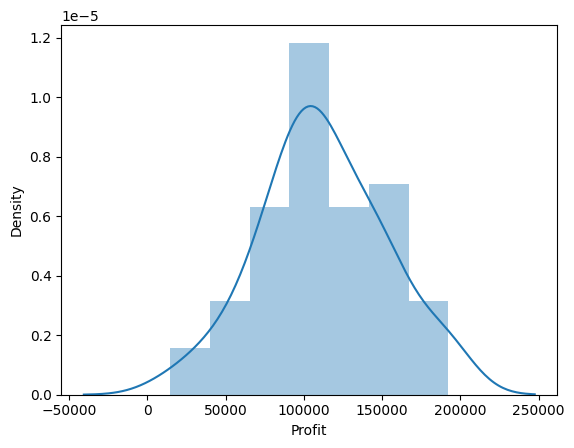

In [139]:
sns.distplot(df['Profit'])

C:\Users\A\AppData\Local\Temp\ipykernel_4556\2499201183.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['R&D Spend'])


<Axes: xlabel='R&D Spend', ylabel='Density'>

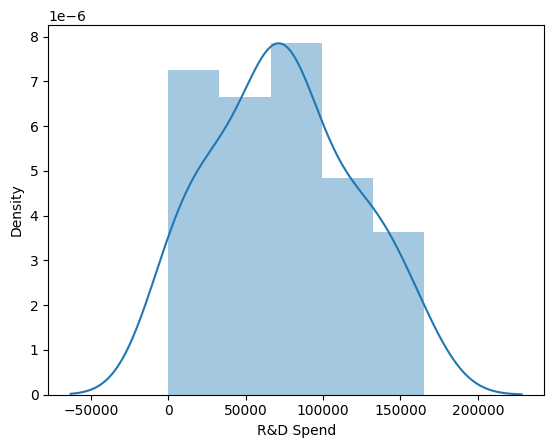

In [140]:
sns.distplot(df['R&D Spend'])

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [142]:
x = df.iloc[:,0:4]
y =df.iloc[:,-1]

In [143]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [144]:
x_train.count()

R&D Spend          35
Administration     35
Marketing Spend    35
State              35
dtype: int64

In [145]:
x_test.count()

R&D Spend          15
Administration     15
Marketing Spend    15
State              15
dtype: int64

In [146]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 6 to 38
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        35 non-null     float64
 1   Administration   35 non-null     float64
 2   Marketing Spend  35 non-null     float64
 3   State            35 non-null     object 
dtypes: float64(3), object(1)
memory usage: 1.4+ KB


In [147]:
trf1 = ColumnTransformer([
    ('min_max_numerical',MinMaxScaler(),[0,1,2])
],remainder='passthrough')

In [148]:
trf2 = ColumnTransformer([
    ("state_ohe",OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),[3])
],remainder='passthrough')

In [149]:
trf3 = ColumnTransformer([
    ('numerical_discretization',KBinsDiscretizer(n_bins=15,strategy="kmeans",encode='onehot'),[0,1,2])
],remainder='passthrough')

In [150]:
trf4 = LinearRegression()

In [151]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4)
])

In [152]:
pipe.fit(x_train,y_train)

c:\Users\A\.conda\envs\ml_env\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\A\.conda\envs\ml_env\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\A\.conda\envs\ml_env\Lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\A\.conda\envs\ml_env\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  retur

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('min_max_numerical',
                                                  MinMaxScaler(),
                                                  [0, 1, 2])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('state_ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [3])])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical_discretization',
                                                  KBinsDiscretizer(n_bins=15,
                                                                   strategy='kmeans'),
                                                  [0, 1, 2])])),
                ('trf4', LinearRegression())])

In [153]:
y_predict = pipe.predict(x_test)

In [154]:
r2_score(y_test,y_predict)

0.895084742607218

In [157]:
cross_val_score(pipe,x_train,y_train,cv=5,scoring='r2').mean()

c:\Users\A\.conda\envs\ml_env\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\A\.conda\envs\ml_env\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\A\.conda\envs\ml_env\Lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\A\.conda\envs\ml_env\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  retur

0.9144423674366575